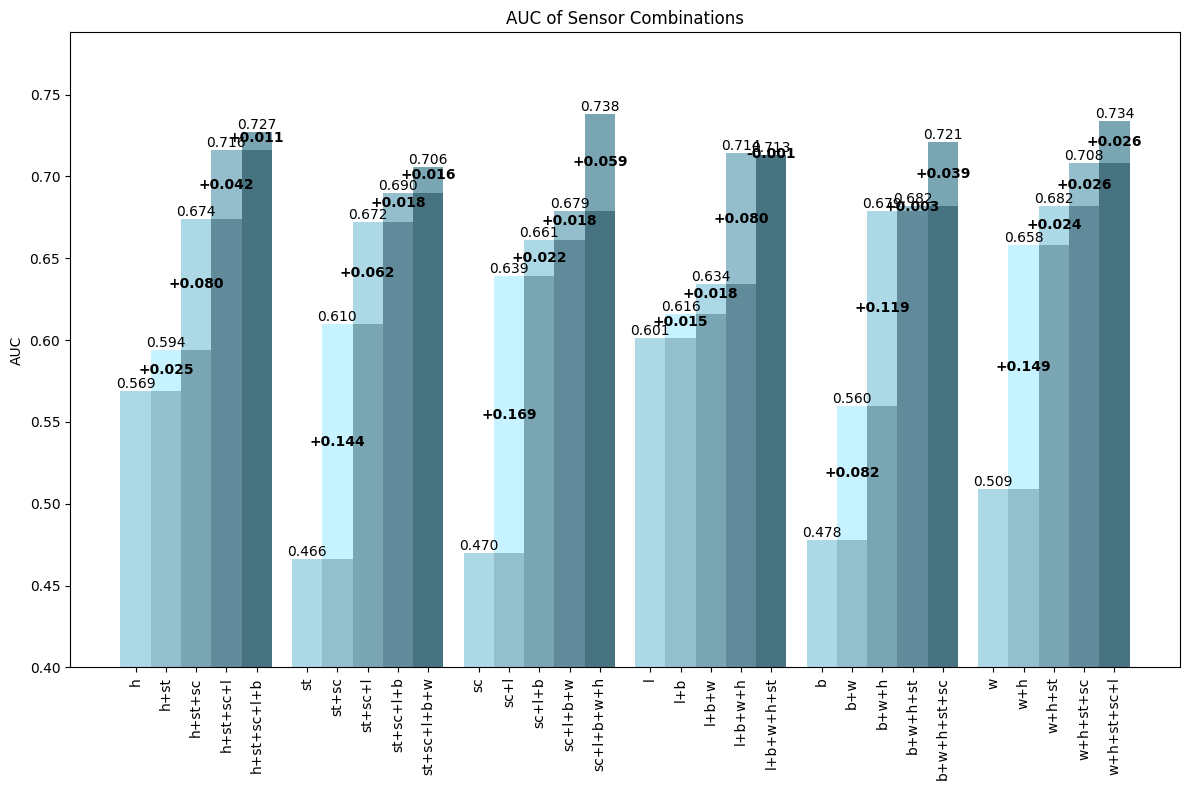

In [1]:
import matplotlib.pyplot as plt

base_color = [173/255, 216/255, 230/255]  # This is light blue

sensor_data = [
    (['h', 'h+st', 'h+st+sc', 'h+st+sc+l', 'h+st+sc+l+b'], [0.569, 0.594, 0.674, 0.716, 0.727]),
    (['st', 'st+sc', 'st+sc+l', 'st+sc+l+b', 'st+sc+l+b+w'], [0.466, 0.61, 0.672, 0.69, 0.706]),
    (['sc', 'sc+l', 'sc+l+b', 'sc+l+b+w', 'sc+l+b+w+h'], [0.47, 0.639, 0.661, 0.679, 0.738]),
    (['l', 'l+b', 'l+b+w', 'l+b+w+h', 'l+b+w+h+st'], [0.601, 0.616, 0.634, 0.714, 0.713]),
    (['b', 'b+w', 'b+w+h', 'b+w+h+st', 'b+w+h+st+sc'], [0.478, 0.56, 0.679, 0.682, 0.721]),
    (['w', 'w+h', 'w+h+st', 'w+h+st+sc', 'w+h+st+sc+l'], [0.509, 0.658, 0.682, 0.708, 0.734])
]

bar_width = 0.3
gap = 0.2
x_positions = []

fig, ax = plt.subplots(figsize=(12, 8))

ax.set_ylim(0.4, max([max(val) for _, val in sensor_data]) + 0.05)

for i in range(len(sensor_data)):
    start_position = i * (len(sensor_data[0][0]) * bar_width + gap)
    positions = [start_position + j * bar_width for j in range(len(sensor_data[0][0]))]
    x_positions.extend(positions)

for data, positions in zip(sensor_data, range(6)):
    labels, values = data
    colors = [[max(0, base_color[0]-i*0.1), max(0, base_color[1]-i*0.1), max(0, base_color[2]-i*0.1)] for i in range(len(labels))]
    lighter_colors = [[min(1, col[0]+0.1), min(1, col[1]+0.1), min(1, col[2]+0.1)] for col in colors]

    bars = ax.bar(x_positions[positions*5:(positions+1)*5], values, color=colors, width=bar_width)

    for i in range(1, len(values)):
        improvement = values[i] - values[i-1]
        if improvement > 0:
            ax.bar(x_positions[positions*5+i], improvement, bottom=values[i-1], color=lighter_colors[i-1], width=bar_width)

    for i, rect in enumerate(bars):
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., height, f'{height:.3f}', ha='center', va='bottom', fontsize=10)

    for i in range(1, len(values)):
        improvement = values[i] - values[i-1]
        position = values[i-1] + improvement / 2
        if improvement > 0 and improvement < 0.02:
            position = values[i-1] + improvement / 1.5
        ax.text(x_positions[positions*5+i], position, f'{improvement:+.3f}', ha='center', va='center', color='black', weight='bold', size=10)

ax.set_ylabel('AUC')
ax.set_title('AUC of Sensor Combinations')
ax.set_xticks(x_positions)
all_labels = [label for data in sensor_data for label in data[0]]
ax.set_xticklabels(all_labels, rotation=90)

plt.tight_layout()
plt.savefig('1.png')
plt.show()